<strong><b><font size="5">Web Scraping e Análise de Dados</font></b></strong>

<strong><b><font size="4">Web Scraping e Análise no Google Trends</font></b></strong>

<strong><b><font size="4">Quais São as Principais Tendências Relacionado à emprestimo e abrir conta</font></b></strong>

## Definição do Problema

Será uma análise de tendência de busca de algumas palavras já definidas no algoritimo, para analisar a frequencia ao longo do tempo e buscar novos insights.
Vou utilizar a API Python chamada pytrends.

## Fonte de Dados

Nossa fonte de dados será o site oficial do <a href="https://trends.google.com/">Google Trends</a>.

Segue link da documentação da API utilizada para extração dos dados: https://pypi.org/project/pytrends/

## Carregando os Pacotes 

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.9


In [2]:
# Imports
import os
import pytrends
import datetime
import more_itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plotter
from datetime import date
from pytrends.request import TrendReq
from pandas.io.json import json_normalize
from more_itertools import chunked
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
# versoes do meu note
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

pandas         1.1.5
numpy          1.19.2
seaborn        0.11.0
more_itertools 8.5.0
Data Science Academy


In [4]:
# Versões dos pacotes usados neste jupyter notebook
# %reload_ext watermark
# %watermark -a "Data Science Academy" --iversions

## Escolhendo as Keywords Para Busca

Com base nos bancos digitais vou utilizar as palavras  'emprestimo', 'ac'.

banco inter  banco c6 banco neon banco next

In [5]:
# Keyword 1
keyword_1 = "abrir conta"
# input()

In [6]:
# Keyword 2
keyword_2 = 'nubank'
# input()

In [7]:
# Keyword 3
keyword_3 = 'banco inter'
# input()

In [8]:
# Keyword 4
keyword_4 = 'banco c6'
# input()

Como apenas um termo é obrigatório, vamos checar se o usuário digitou mais de um termo e criar uma lista de termos chave.

In [9]:
# Gravando a primeira keyword na lista
lista_palavras_chave = [keyword_1]

In [10]:
# Se mais de um termo foi digitado, fazemos append à lista
if keyword_2:
    lista_palavras_chave.append(keyword_2)
if keyword_3:
    lista_palavras_chave.append(keyword_3)
if keyword_4:
    lista_palavras_chave.append(keyword_4)    

In [11]:
# Lista de keywords
lista_palavras_chave

['abrir conta', 'nubank', 'banco inter', 'banco c6']

## Definição do Período de Análise das Tendências

Agora vamos verificar o período que o usuário quer fazer a pesquisa.

In [12]:
# Variável para definição do timeframe (período) de análise
user_timeframe = '' 

In [13]:
# Timeframe
timeframe_list = ('\nAqui está a lista dos timeframes disponíveis: \n\n Para Todos: Todos \n Últimos 5 Anos: 5 anos \n Últimos 4 Anos: 4 anos \n Últimos 3 Anos: 3 anos \n Últimos 2 Anos: 2 anos \n Últimos 1 Ano: 1 ano')
print(timeframe_list)



Aqui está a lista dos timeframes disponíveis: 

 Para Todos: Todos 
 Últimos 5 Anos: 5 anos 
 Últimos 4 Anos: 4 anos 
 Últimos 3 Anos: 3 anos 
 Últimos 2 Anos: 2 anos 
 Últimos 1 Ano: 1 ano


Agora solicitamos que o usuário digite o timeframe desejado.

In [14]:
# Solicita que o usuário digite o timeframe que usaremos para buscar as tendências
user_timeframe = "5 anos" 
# input ('Indique o período de busca no formato especificado na lista (por exemplo: 3 anos): ')

In [15]:
# Convertemos a escolha do usuário em um valor numérico

if user_timeframe == "5 anos":
    num_anos = 5
elif user_timeframe == "4 anos":
    num_anos = 4
elif user_timeframe == "3 anos":
    num_anos = 3
elif user_timeframe == "2 anos":
    num_anos = 2
else:
    num_anos = 1

In [16]:
# Variáveis de controle para definição do range total
num_dias = 7
num_semanas = 52
total_time_range = num_dias * num_semanas * num_anos

In [17]:
total_time_range

1820

In [18]:
# Data final e data atual
data_final = date.today()
data_atual = date.today()

In [19]:
data_final, data_atual

(datetime.date(2021, 3, 15), datetime.date(2021, 3, 15))

In [20]:
# Data final recebe data atual
data_final = data_atual

In [21]:
# Data de início
data_inicio = data_final - datetime.timedelta(days = total_time_range)

In [22]:
data_inicio

datetime.date(2016, 3, 21)

In [23]:
# Agora definimos o timeframe de pesquisa de tendências com a data de início e final
user_timeframe = data_inicio.strftime('%Y-%m-%d') + ' ' + data_final.strftime('%Y-%m-%d')

In [24]:
print(user_timeframe)

2016-03-21 2021-03-15


Perfeito. Temos o range de datas para o Google Trends. Vamos agora definir o país para análise.

## Definição da Localidade de Análise das Tendências

In [25]:
# Variável para a localidade
user_geo = ''

In [26]:
# Obtendo input do usuário
user_geo = "BR"
# input ('Indique o País Para Análise dos Dados. Exemplo: Brasil é BR. ')

In [27]:
print(user_geo)

BR


## Extração dos Dados do Google Trends

Já temos os parâmetros que precisamos. Agora usamos o PyTrends para buscar os dados.

In [28]:
# Categoria
user_cat = 0 

In [29]:
# Cria o objeto para busca no Google Trends
pytrend = TrendReq()

In [30]:
user_timeframe

'2016-03-21 2021-03-15'

In [31]:
# Extraindo os dados do Google Trends
pytrend.build_payload(kw_list = lista_palavras_chave, 
                      cat = user_cat, 
                      timeframe = user_timeframe, 
                      geo = user_geo)

In [32]:
# Vamos colocar os dados do interesse ao longo do tempo em um dataframe para começarmos a análise
df_interesse = pytrend.interest_over_time()

In [33]:
# Shape
df_interesse.shape

(259, 5)

In [34]:
# Visualiza os dados
df_interesse.head(-2)

,abrir conta,nubank,banco inter,banco c6,isPartial
date,,,,,
2016-03-27,10,6,0,0,False
2016-04-03,8,7,0,0,False
2016-04-10,9,8,0,0,False
2016-04-17,10,6,0,0,False
2016-04-24,11,8,0,0,False
...,...,...,...,...,...
2021-01-24,21,59,22,2,False
2021-01-31,18,62,23,3,False
2021-02-07,20,59,23,2,False


In [35]:
# Vamos salvar os dados em disco para o caso de não conseguir conectar ao Google Trends
df_interesse.to_csv("df_interesse.csv", index = True)

Coleta de dados realizada com sucesso. Simples, não? Esses dados podem ser muito úteis para que uma empresa compreenda as tendências ao longo do tempo sobre determinado assunto. Agora, vamos analisar os dados.

## Análise de Dados

Iremos organizar os dados e analisá-los por diferentes perspectivas.

### Análise 1 - Interesse nas Keywords ao Longo do Tempo (Timeframe Escolhido Pelo Usuário)

In [36]:
# Variáveis para o gráfico
num_dias = 7
num_semanas = 52
lista_datas = [data_inicio]

In [37]:
datetime.timedelta(days = num_dias)

datetime.timedelta(days=7)

In [38]:
# Preparamos a lista de datas
for index in range (0, num_semanas * num_anos - 2):
    lista_datas.append(lista_datas[index] + datetime.timedelta(days = num_dias)) 

In [39]:
len(lista_datas)

259

In [40]:
# Lista de datas para o plot
lista_datas[0:10]

[datetime.date(2016, 3, 21),
 datetime.date(2016, 3, 28),
 datetime.date(2016, 4, 4),
 datetime.date(2016, 4, 11),
 datetime.date(2016, 4, 18),
 datetime.date(2016, 4, 25),
 datetime.date(2016, 5, 2),
 datetime.date(2016, 5, 9),
 datetime.date(2016, 5, 16),
 datetime.date(2016, 5, 23)]

### Podemos perceber que a keyword com maior crescimento foi 'nubank' e um pouco distante em segundo foi  'banco inter'.

### Um leve crescimento em 'abrir conta' demonstrando que temos novos clientes procurando bancos ou clientes trocando de banco.

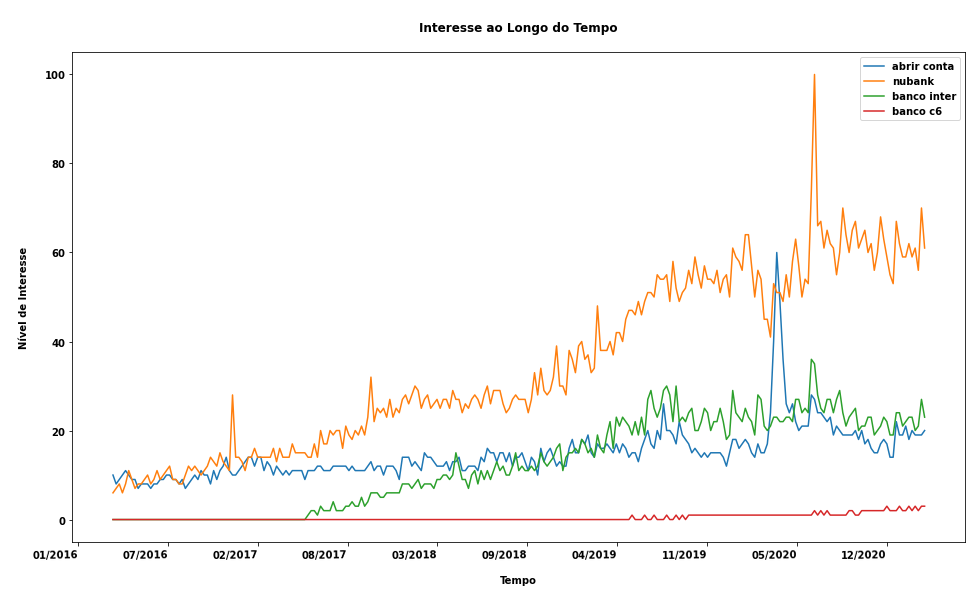

In [41]:
# Plot
x_axis = lista_datas
plt.figure(figsize = (16,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(0,40 * num_anos))
plt.gcf().autofmt_xdate()
plt.plot(x_axis, df_interesse.iloc[:,0], label = '{}'.format(keyword_1))
if keyword_2:
    plt.plot (x_axis, df_interesse.iloc[:,1], label = '{}'.format(keyword_2))
if keyword_3:
    plt.plot (x_axis, df_interesse.iloc[:,2], label = '{}'.format(keyword_3))
if keyword_4:
    plt.plot (x_axis, df_interesse.iloc[:,3], label = '{}'.format(keyword_4))    
plt.xticks(rotation = 1)
plt.xlabel('\nTempo\n')
plt.ylabel('\nNível de Interesse\n')
plt.title('\nInteresse ao Longo do Tempo\n')
plt.legend()

# plt.savefig('Grafio_julia_java_python_sql')

plt.show()

### Análise 2 - Buscas Relacionadas à Keyword 1

In [42]:
# Extraímos as consultas relacionadas e filtramos pela Keyword 1
related_queries_dict = pytrend.related_queries()
keyword_1_top_search = related_queries_dict['{}'.format(keyword_1)]['top']
keyword_1_top_search 

,query,value
0,abrir conta caixa,100
1,conta caixa,99
2,abrir uma conta,97
3,abrir conta na caixa,74
4,abrir conta poupança,56
5,conta poupança,56
6,como abrir uma conta,46
7,banco do brasil,35
8,banco do brasil abrir conta,34
9,conta poupança caixa,32


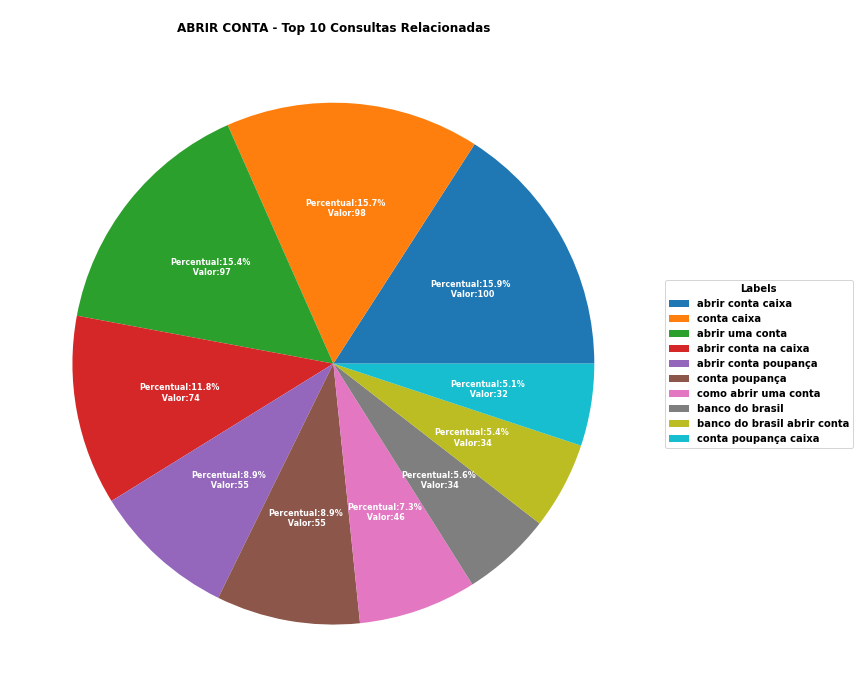

In [43]:
# Vamos separar as consultas relacionadas por percentual e listas as Top 10
if keyword_1:
    
    # Extrai as Top 10 consultas relacionadas
    if len(keyword_1_top_search.iloc[:,0]) >= 10:
        keyword_1_top_search = keyword_1_top_search.head(10)
        
    # Gráfico
    fig, ax = plt.subplots(figsize = (12,12), subplot_kw = dict(aspect = "equal"))

    # Nomes das fatias do gráfico
    pieLabels = keyword_1_top_search.iloc[:,0] 

    # Dados
    data = keyword_1_top_search.iloc[:,1]

    # Função para calcular o percentual
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "Percentual:{:.1f}%\n Valor:{:d}".format(pct, absolute)

    # Prepara os dados para o gráfico
    wedges, texts, autotexts = ax.pie(data, autopct = lambda pct: func(pct, data), textprops = dict(color = "w"))

    # Legendas
    ax.legend(wedges, pieLabels, title = "Labels", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

    # Plot
    plt.setp(autotexts, size = 8, weight = "bold")
    
    # Título
    ax.set_title("\n{} - Top 10 Consultas Relacionadas".format(keyword_1.upper()))

    plt.show()

Foi verificado as consultas relacionadas à query 'abrir conta' que tiveram maior crescimento no período em questão.

Constatamos que dentre as top 5 com maior crescimento do periodo analisado, estão 'nubank abrir conta' em primeiro e  'abrir conta banco inter' em terceiro. 

Mostrando uma correlação com nubank e banco inter, as quais já demonstraram crescimento no primeiro gráfico.

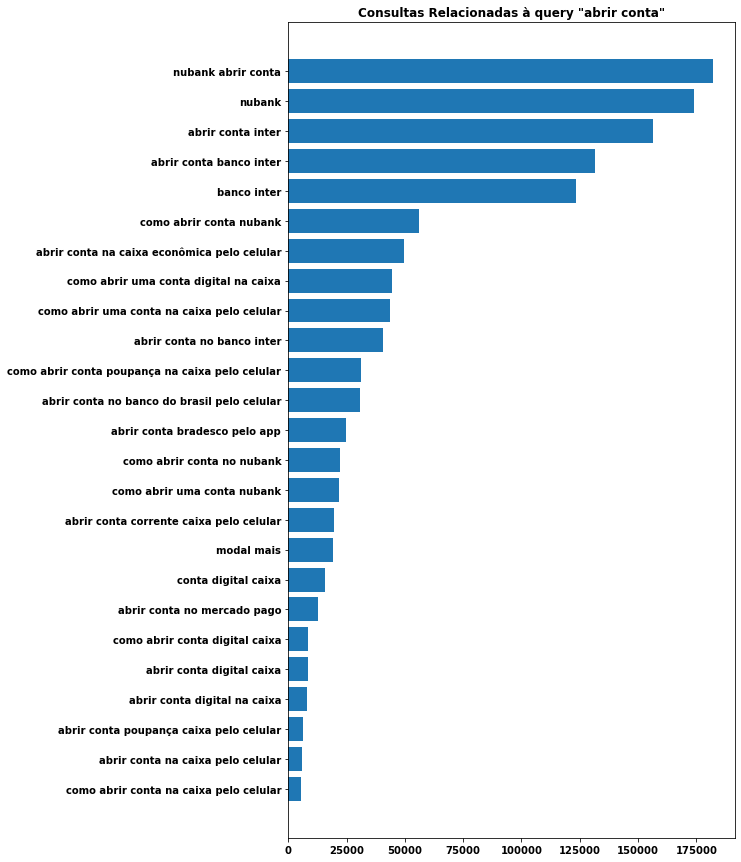

In [87]:
plt.figure(figsize=(8,15))
keyword_1_rising_search = related_queries_dict['{}'.format(keyword_1)]['rising'].sort_values(by='value')
plt.barh(keyword_1_rising_search['query'], keyword_1_rising_search.value)
plt.title('Consultas Relacionadas à query "abrir conta"')

plt.show()

### Análise 3 - Buscas Relacionadas à Keyword 2

In [45]:
# Extraímos as consultas relacionadas e filtramos pela Keyword 2
keyword_2_top_search = related_queries_dict['{}'.format(keyword_2)]['top']
keyword_2_top_search

,query,value
0,nubank cartão,100
1,cartao nubank,86
2,nubank conta,46
3,nubank credito,42
4,banco nubank,40
5,nubank cartao credito,30
6,nubank cartao de credito,28
7,cartao de credito,27
8,nubank cartão de crédito,22
9,cartão de crédito,21


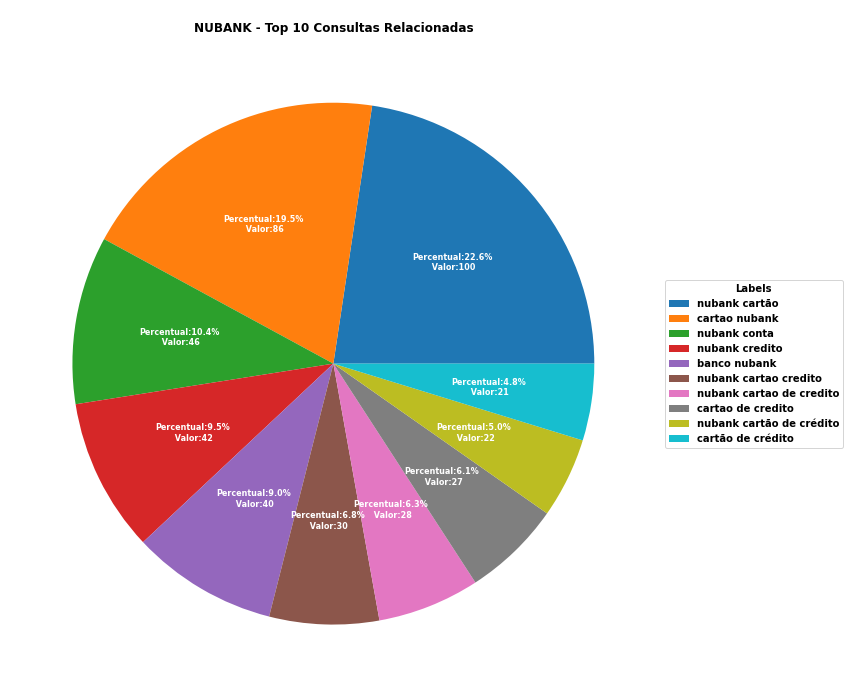

In [46]:
# Vamos separar as consultas relacionadas por percentual e listas as Top 10
if keyword_2:
    
    # Extrai as Top 10 consultas relacionadas
    if len(keyword_2_top_search.iloc[:,0]) >= 10:
        keyword_2_top_search = keyword_2_top_search.head(10)
        
    # Gráfico
    fig, ax = plt.subplots(figsize = (12,12), subplot_kw = dict(aspect = "equal"))

    # Nomes das fatias do gráfico
    pieLabels = keyword_2_top_search.iloc[:,0] 

    # Dados
    data = keyword_2_top_search.iloc[:,1]

    # Função para calcular o percentual
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "Percentual:{:.1f}%\n Valor:{:d}".format(pct, absolute)

    # Prepara os dados para o gráfico
    wedges, texts, autotexts = ax.pie(data, autopct = lambda pct: func(pct, data), textprops = dict(color = "w"))

    # Legendas
    ax.legend(wedges, pieLabels, title = "Labels", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

    # Plot
    plt.setp(autotexts, size = 8, weight = "bold")
    
    # Título
    ax.set_title("\n{} - Top 10 Consultas Relacionadas".format(keyword_2.upper()))

    plt.show()

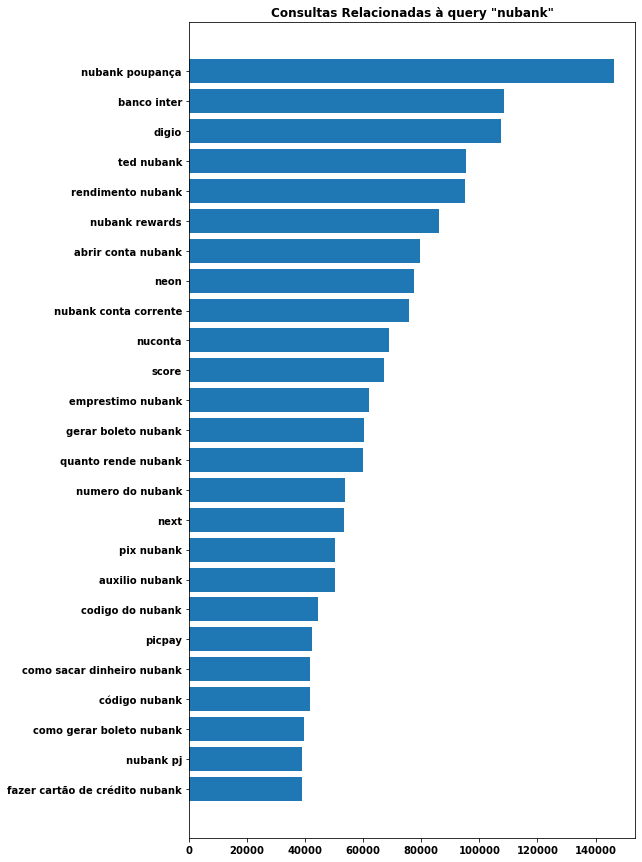

In [88]:
# Vamos verificar qual consulta relacionada teve maior crescimento no período analisado
plt.figure(figsize=(8,15))
keyword_2_rising_search = related_queries_dict['{}'.format(keyword_2)]['rising'].sort_values(by='value')
keyword_2_rising_search
plt.barh(keyword_2_rising_search['query'], keyword_2_rising_search.value)
plt.title('Consultas Relacionadas à query "nubank"')

plt.show()

### Análise 4 - Buscas Relacionadas à Keyword 3

In [48]:
# Extraímos as consultas relacionadas e filtramos pela Keyword 3
keyword_3_top_search = related_queries_dict['{}'.format(keyword_3)]['top']
keyword_3_top_search

,query,value
0,banco inter conta,100
1,conta inter,93
2,cartao inter,64
3,cartao banco inter,63
4,ações banco inter,60
5,telefone banco inter,50
6,cartão inter,50
7,cartão banco inter,48
8,nubank,46
9,numero banco inter,46


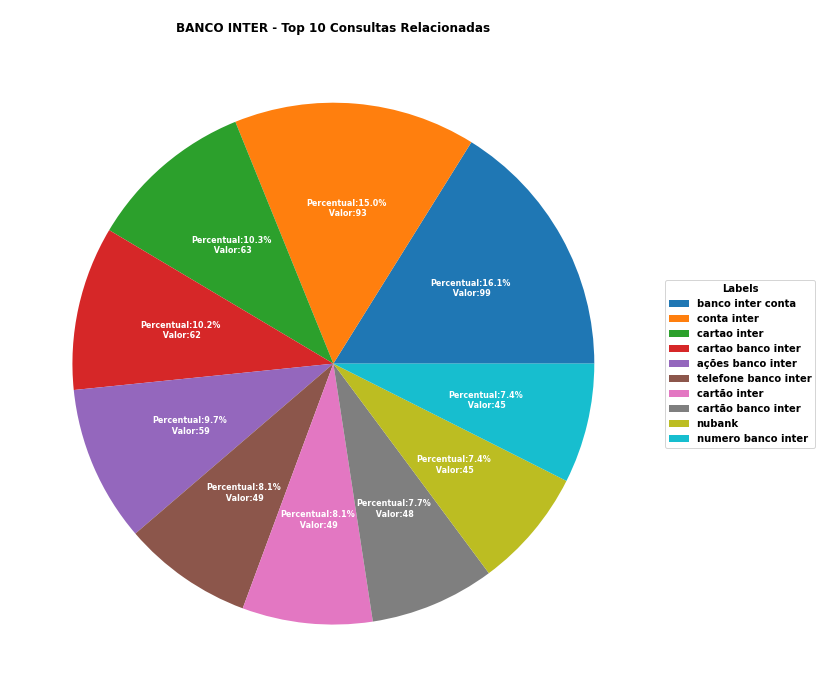

In [49]:
# Vamos separar as consultas relacionadas por percentual e listas as Top 10
if keyword_3:
    
    # Extrai as Top 10 consultas relacionadas
    if len(keyword_3_top_search.iloc[:,0]) >= 10:
        keyword_3_top_search = keyword_3_top_search.head(10)
        
    # Gráfico
    fig, ax = plt.subplots(figsize = (12,12), subplot_kw = dict(aspect = "equal"))

    # Nomes das fatias do gráfico
    pieLabels = keyword_3_top_search.iloc[:,0] 

    # Dados
    data = keyword_3_top_search.iloc[:,1]

    # Função para calcular o percentual
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "Percentual:{:.1f}%\n Valor:{:d}".format(pct, absolute)

    # Prepara os dados para o gráfico
    wedges, texts, autotexts = ax.pie(data, autopct = lambda pct: func(pct, data), textprops = dict(color = "w"))

    # Legendas
    ax.legend(wedges, pieLabels, title = "Labels", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

    # Plot
    plt.setp(autotexts, size = 8, weight = "bold")
    
    # Título
    ax.set_title("\n{} - Top 10 Consultas Relacionadas".format(keyword_3.upper()))

    plt.show()

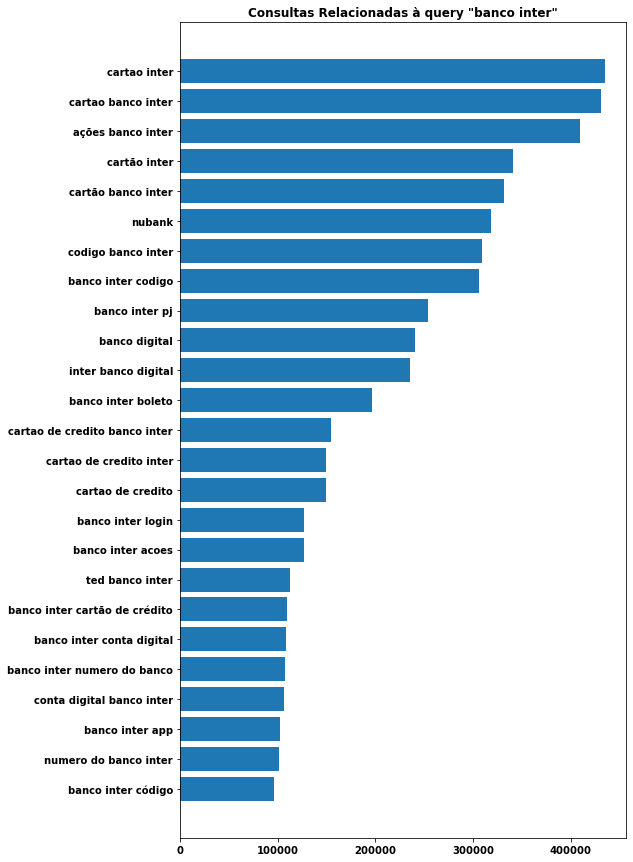

In [89]:
# Vamos verificar qual consulta relacionada teve maior crescimento no período analisado
plt.figure(figsize=(8,15))
keyword_3_rising_search = related_queries_dict['{}'.format(keyword_3)]['rising'].sort_values(by='value')
keyword_3_rising_search
plt.barh(keyword_3_rising_search['query'], keyword_3_rising_search.value)
plt.title('Consultas Relacionadas à query "banco inter"')

plt.show()                      

### Análise 5 - Buscas Relacionadas à Keyword 4

In [51]:
# Extraímos as consultas relacionadas e filtramos pela Keyword 3
keyword_4_top_search = related_queries_dict['{}'.format(keyword_4)]['top']
keyword_4_top_search                                                

,query,value
0,c6 bank,100
1,banco c6 bank,99
2,banco inter,36
3,banco digital,19
4,nubank,19
5,banco c6 consignado,18
6,banco c6 telefone,17
7,banco digital c6,16
8,c6 bank qual banco,15
9,banco c6 numero,14


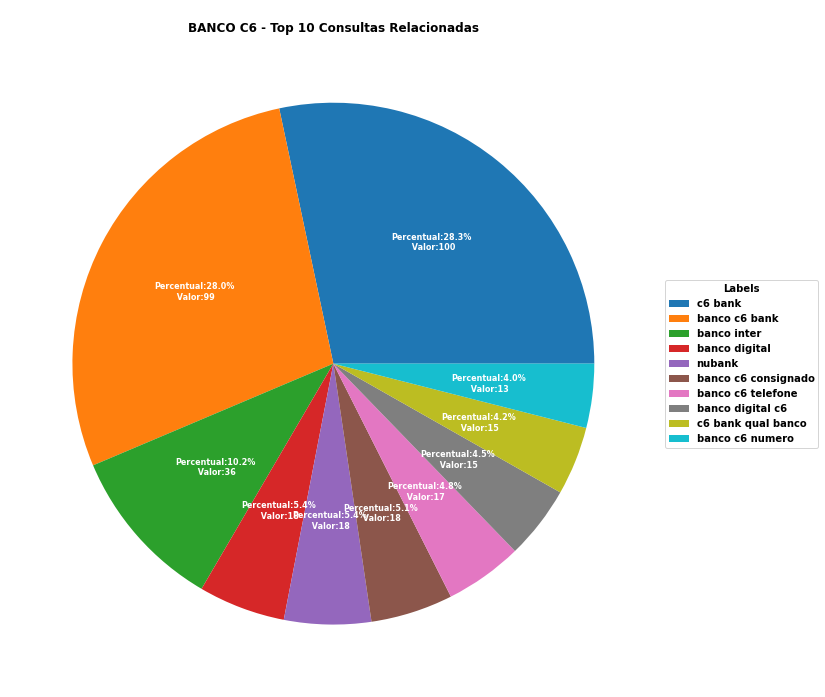

In [52]:
# Vamos separar as consultas relacionadas por percentual e listas as Top 10
if keyword_4:
    
    # Extrai as Top 10 consultas relacionadas
    if len(keyword_4_top_search.iloc[:,0]) >= 10:
        keyword_4_top_search = keyword_4_top_search.head(10)
        
    # Gráfico
    fig, ax = plt.subplots(figsize = (12,12), subplot_kw = dict(aspect = "equal"))

    # Nomes das fatias do gráfico
    pieLabels = keyword_4_top_search.iloc[:,0] 

    # Dados
    data = keyword_4_top_search.iloc[:,1]

    # Função para calcular o percentual
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "Percentual:{:.1f}%\n Valor:{:d}".format(pct, absolute)

    # Prepara os dados para o gráfico
    wedges, texts, autotexts = ax.pie(data, autopct = lambda pct: func(pct, data), textprops = dict(color = "w"))

    # Legendas
    ax.legend(wedges, pieLabels, title = "Labels", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

    # Plot
    plt.setp(autotexts, size = 8, weight = "bold")
    
    # Título
    ax.set_title("\n{} - Top 10 Consultas Relacionadas".format(keyword_4.upper()))

    plt.show()

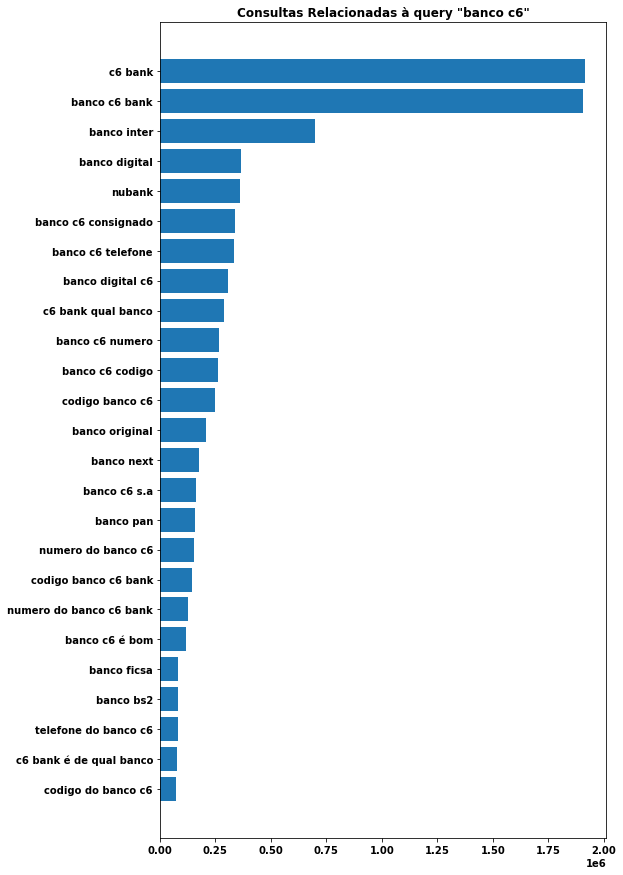

In [90]:
# Vamos verificar qual consulta relacionada teve maior crescimento no período analisado
plt.figure(figsize=(8,15))
keyword_4_rising_search = related_queries_dict['{}'.format(keyword_4)]['rising'].sort_values(by='value')
keyword_4_rising_search
plt.barh(keyword_4_rising_search['query'], keyword_4_rising_search.value)
plt.title('Consultas Relacionadas à query "banco c6"')

plt.show()

### Análise 5 - Média Mensal de Buscas com as Palavras-Chave

In [54]:
# Termos de busca
lista_palavras = [keyword_1, keyword_2, keyword_3, keyword_4]

In [55]:
# Lista
lista_palavras

['abrir conta', 'nubank', 'banco inter', 'banco c6']

In [56]:
# Prepara as datas (observe o range, que agora é maior)
set_begin_date = datetime.datetime(2015, 1, 1)
set_end_date = datetime.datetime(2020, 3, 15)
print(set_begin_date.date(), set_end_date.date())

2015-01-01 2020-03-15


In [57]:
# Timeframe
user_timeframe = set_begin_date.strftime('%Y-%m-%d') + ' ' + set_end_date.strftime('%Y-%m-%d')

In [58]:
user_timeframe

'2015-01-01 2020-03-15'

In [59]:
# Busca no Google Trends
pytrend.build_payload(kw_list = lista_palavras, 
                      cat = 0, 
                      timeframe = user_timeframe, 
                      geo = 'BR', 
                      gprop = '')

In [60]:
# Salvamos a busca em disco
pytrend.interest_over_time().to_csv("interesse_anual.csv", index = True)

In [61]:
# Carrega o arquivo do disco
dados_brutos = pd.read_csv('interesse_anual.csv')
dados_brutos.head(10)

,date,abrir conta,nubank,banco inter,banco c6,isPartial
0,2015-01-01,15,1,0,0,False
1,2015-02-01,15,1,0,0,False
2,2015-03-01,14,1,0,0,False
3,2015-04-01,14,1,0,0,False
4,2015-05-01,13,4,0,0,False
5,2015-06-01,14,4,0,0,False
6,2015-07-01,15,6,0,0,False
7,2015-08-01,15,7,0,0,False
8,2015-09-01,14,10,0,0,False
9,2015-10-01,13,9,0,0,False


In [62]:
# Removemos a última coluna
dados_brutos = dados_brutos.drop(dados_brutos.columns[[-1]], axis = 1) 

In [63]:
# Visualiza os dados
dados_brutos.head()

,date,abrir conta,nubank,banco inter,banco c6
0,2015-01-01,15,1,0,0
1,2015-02-01,15,1,0,0
2,2015-03-01,14,1,0,0
3,2015-04-01,14,1,0,0
4,2015-05-01,13,4,0,0


In [64]:
# Criamos uma coluna de data
dados_brutos["date"] = pd.to_datetime(dados_brutos["date"])

In [65]:
# Calculamos a média mensal de buscas
media_mensal = []
for i in range(0, 12):
    media_mensal.append(dados_brutos.loc[dados_brutos["date"].dt.month == i+1,].mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sy

In [66]:
# Ajustamos a média mensal
media_mensal = pd.DataFrame(media_mensal, 
                            index = ['1','2','3','4','5','6','7','8','9','10','11','12'], 
                            columns = ['{}'.format(keyword_1), '{}'.format(keyword_2), '{}'.format(keyword_3), '{}'.format(keyword_4)])

In [67]:
# Visualiza os dados
media_mensal

,abrir conta,nubank,banco inter,banco c6
1,21.333333,39.000000,13.000000,0.333333
2,20.666667,39.833333,13.166667,0.333333
3,20.500000,37.333333,13.166667,0.166667
4,18.600000,29.000000,10.200000,0.000000
5,18.200000,31.200000,10.400000,0.000000
6,17.800000,33.400000,10.400000,0.200000
7,20.200000,36.200000,12.400000,0.200000
8,21.400000,38.000000,13.200000,0.200000
9,19.800000,37.400000,12.800000,0.200000
10,19.600000,40.800000,12.400000,0.200000


<AxesSubplot:>

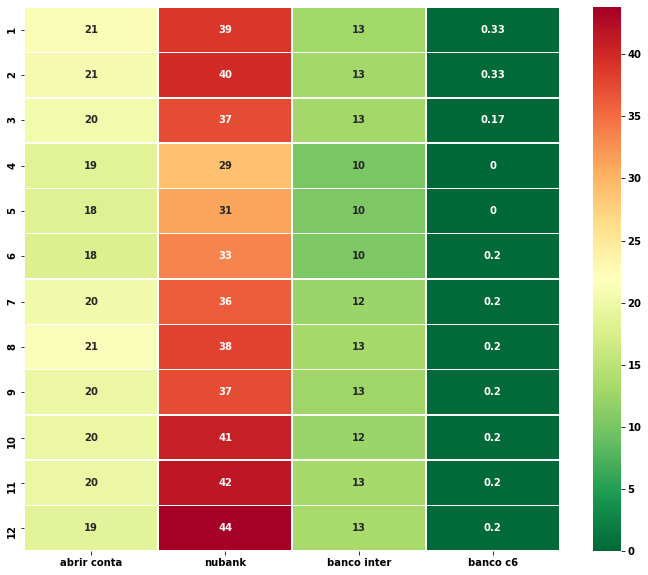

In [68]:
# Plot
plt.figure(figsize = (12,10))
sns.heatmap(media_mensal, cmap = 'RdYlGn_r', annot = True, linewidth = 0.5)

Há muito ainda a explorar com o PyTrends. Consulte a documentação e use o Google Trends para prever as tendências do mercado.

# Fim